In [234]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn
import scipy
%matplotlib inline

In [235]:
import datetime

In [236]:
results = pd.DataFrame({"LocalScore": [1.36406], "MyScore": [1.36788], 
                        "Date": [datetime.datetime.now().strftime('%m/%d/%y')], 
                                 "Rank": [240], 
                        "Description": ["Logistic regression using initial features"],
                       })

In [237]:
results = results.append({"LocalScore": 1.64493, "MyScore": "0", 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Random Forest with 100 estimators"
                       }, ignore_index = True)
results = results.append({"LocalScore": 4.25146, "MyScore": "0", 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Random Forest with 10 estimators"
                       }, ignore_index = True)
results = results.append({"LocalScore": 1.44762, "MyScore": "0", 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Random Forest with 200 estimators"
                       }, ignore_index = True)
results = results.append({"LocalScore": 1.37421, "MyScore": "0", 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Random Forest with 300 estimators"
                       }, ignore_index = True)
results = results.append({"LocalScore": 1.31995, "MyScore": 1.34620, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Random Forest with 400 estimators"
                       }, ignore_index = True)
results = results.append({"LocalScore": 30.04107, "MyScore": 0, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Gaussian Naive Bayes"
                       }, ignore_index = True)
results = results.append({"LocalScore": 1.37899, "MyScore": 1.38825, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Bernoulli Naive Bayes"
                       }, ignore_index = True)
results = results.append({"LocalScore": 6.31217, "MyScore": 0, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "K-Neighbors", "Rank": 0
                       }, ignore_index = True)
results = results.append({"LocalScore": 4.46558, "MyScore": 0, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "LinearSVC with decision_function", "Rank": 0
                       }, ignore_index = True)
results = results.append({"LocalScore": 2.06826, "MyScore": 0, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "ExtraTrees", "Rank": 0
                       }, ignore_index = True)
results = results.append({"LocalScore": 1.29012, "MyScore": 1.30906, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Random Trees with 2 max features", "Rank": 232
                       }, ignore_index = True)
results = results.append({"LocalScore": 0.93294, "MyScore": 0.94074, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "First XGBoost run, 74 rounds", "Rank": 176
                       }, ignore_index = True)
results = results.append({"LocalScore": 0.83730, "MyScore": 0.84924, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Fineline +300 Occurences", "Rank": 173
                       }, ignore_index = True)
results = results.append({"LocalScore": 0.82405, "MyScore": 0.83314, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Fineline +400 Occurences", "Rank": 173
                       }, ignore_index = True)
results = results.append({"LocalScore": 0.81711, "MyScore": 0.82669, 
                        "Date": datetime.datetime.now().strftime('%m/%d/%y'),
               "Description": "Adding CategoryCounts", "Rank": 169
                       }, ignore_index = True)

results.ix[1,'Rank'] = 0
results.ix[2,'Rank'] = 0
results.ix[3,'Rank'] = 0
results.ix[4,'Rank'] = 0
results.ix[5,'Rank'] = 230
results.ix[6,'Rank'] = 0
results.ix[7,'Rank'] = 240

results.ix[0,'Date'] = "11/19/17"
results.ix[1,'Date'] = "11/19/17"
results.ix[2,'Date'] = "11/19/17"
results.ix[3,'Date'] = "11/19/17"
results.ix[4,'Date'] = "11/19/17"
results.ix[5,'Date'] = "11/19/17"
results.ix[6,'Date'] = "11/20/17"
results.ix[7,'Date'] = "11/20/17"
results.ix[8,'Date'] = "11/20/17"
results.ix[9,'Date'] = "11/20/17"
results.ix[10,'Date'] = "11/20/17"
results.ix[11,'Date'] = "11/20/17"
results.ix[12,'Date'] = "12/1/17"
results.ix[13,'Date'] = "12/2/17"
results.ix[14,'Date'] = "12/2/17"
results.ix[15,'Date'] = "12/2/17"

results["Accuracy"] = "N/A"
results.ix[12,'Accuracy'] = .69
results.ix[15,'Accuracy'] = .72

In [ ]:
results

In [244]:
def sorting_by_score(results):
    results.MyScore = results.MyScore.astype(float)
    results = results.sort_values(by="LocalScore", ascending=False)
    return results

In [246]:
x = sorting_by_score(results)

In [261]:
x = x[['Description', 'LocalScore']].sort_values(by='LocalScore').set_index('Description')

In [267]:
x = x.rename(columns={'LocalScore' : 'LogLoss'})

In [268]:
x

,LogLoss
Description,
Adding CategoryCounts,0.81711
Fineline +400 Occurences,0.82405
Fineline +300 Occurences,0.83730
"First XGBoost run, 74 rounds",0.93294
Random Trees with 2 max features,1.29012
Random Forest with 400 estimators,1.31995
Logistic regression using initial features,1.36406
Random Forest with 300 estimators,1.37421
Bernoulli Naive Bayes,1.37899


(array([  7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.]),
 <a list of 9 Text xticklabel objects>)

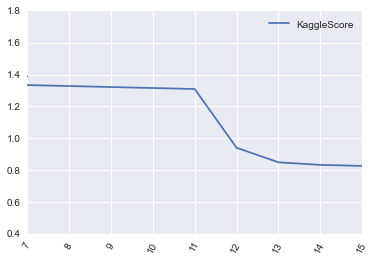

In [231]:
x[['MyScore']].plot()
plt.ylim(.4,1.8)
plt.xticks(rotation=60)

In [203]:
sorting_by_kagglescore

<function __main__.sorting_by_kagglescore>